<a href="https://colab.research.google.com/github/NydiaLiu98/Transport_AI_Course/blob/main/exercise_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset (20210101 - 20211231)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset_exercise_5_clustering_highway_traffic.csv',sep=';')
df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


## From raw table to structured representation

In [3]:
df = df.sort_values(['Date','Interval_5']).copy()

days = np.sort(df['Date'].unique())
ndays = len(days)

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

for i in range(ndays):
  df_d = df.groupby(['Date']).get_group((days[i],))
  for j in range(len(df_d)):
    vectorized_day_dataset[i,df_d.iloc[j]['Interval_5']] = df_d.iloc[j]['flow']

vectorized_day_dataset

array([[ 39.,  18.,  26., ...,  32.,  39.,  34.],
       [ 30.,  32.,  27., ...,  44.,  41.,  39.],
       [ 36.,  44.,  52., ...,  50.,  45.,  23.],
       ...,
       [ 20.,  34.,  31., ...,  38.,  42.,  36.],
       [ 36.,  40.,  25., ...,  38.,  56.,  35.],
       [ 33.,  32.,  34., ..., 130., 129., 117.]])

## Handling missing values

number of nans 277
rate of nans 0.0026350837138508373
(288,)


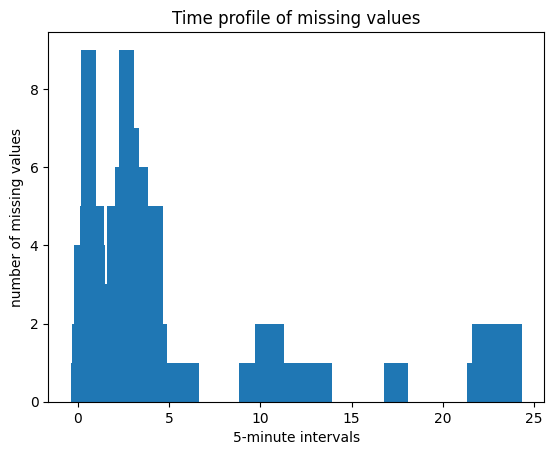

number of days with missing value 28


In [4]:
print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)

ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

We decide to remove missing values.

In [6]:
days_not_nons = days[np.where(nans_per_day == 0)[0]]
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day==0)[0],:]

## Split training and test sets in chronological order

The first 80% of days for training and the remaining 20% for testing.

In [7]:
X = vectorized_day_dataset_no_nans
train_ratio = 0.8
split_idx = int(X.shape[0]* train_ratio)
X_train = X[:split_idx,:]
X_test = X[split_idx:,:]

# Evaluation Dataset

In [8]:
eval_df = pd.read_csv('evaluation_dataset_exercise_5_clustering_highway_traffic.csv', sep=';')
eval_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20220108,00:00:00,00:05:00,0,16.74,35
1,"E4S 56,780",20220108,00:05:00,00:10:00,1,17.57,29
2,"E4S 56,780",20220108,00:10:00,00:15:00,2,16.94,32
3,"E4S 56,780",20220108,00:15:00,00:20:00,3,17.50,27
4,"E4S 56,780",20220108,00:20:00,00:25:00,4,16.21,31
...,...,...,...,...,...,...,...
22939,"E4S 56,780",20221230,23:35:00,23:40:00,283,19.83,43
22940,"E4S 56,780",20221230,23:40:00,23:45:00,284,19.01,35
22941,"E4S 56,780",20221230,23:45:00,23:50:00,285,19.72,45
22942,"E4S 56,780",20221230,23:50:00,23:55:00,286,20.64,49


## From raw table to structured representation

In [9]:
eval_df = eval_df.sort_values(['Date','Interval_5']).copy()

# Extract unique dates from the sorted DataFrame
days_eval = np.sort(eval_df['Date'].unique())
# Calculate the total number of unique days
ndays_eval = len(days_eval)

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)

for i in range(ndays_eval):
  df_d = eval_df.groupby(['Date']).get_group((days_eval[i],))
  for j in range(len(df_d)):
    vectorized_day_dataset_eval[i,df_d.iloc[j]['Interval_5']] = df_d.iloc[j]['flow']

vectorized_day_dataset_eval

array([[35., 29., 32., ..., 62., 66., 71.],
       [44., 44., 51., ..., 30., 31., 23.],
       [21., 22., 17., ..., 20., 22., 22.],
       ...,
       [17., 17., 20., ..., 35., 25., 27.],
       [37., 25., 30., ..., 37., 36., 49.],
       [42., 28., 32., ..., 45., 49., 38.]])

## Handling missing values

In [10]:
print('number of nans',np.sum(np.isnan(vectorized_day_dataset_eval)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset_eval))/(ndays_eval*nintvals))

nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval),1)
print('number of days with missing value',np.size(np.where(nans_per_day_eval > 0),1))

vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval==0)[0],:]

number of nans 96
rate of nans 0.004166666666666667
number of days with missing value 11


In [11]:
vectorized_day_dataset_no_nans_eval.shape

(69, 288)

In [12]:
X_eval = vectorized_day_dataset_no_nans_eval

# Interval & External Evaluation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

## Help Functions for external evaluation

In [14]:
def compute_centroids(data, cluster_labels):
  # Initialize a list to store centroid data
  centroids = []

  # Calculate centroids for each cluster
  for i in np.unique(cluster_labels):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

  return centroids

In [16]:
import sklearn.metrics.pairwise as dis_lib

# Define a function to find the closest centroid to a new data point within a specified day-time interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
  closest_centroid = None
  closest_dist = None

  # Iterate through each centroid
  for i in range(0, len(centroids)):
      # Calculate the Euclidean distance between the centroid and the new data point
      ed_t = dis_lib.paired_distances(centroids[i][:,from_interval:to_interval+1], new_day[:,from_interval:to_interval+1], metric='euclidean')[0]

      # Check if the current centroid is closer than the previously closest one
      if closest_centroid is None or closest_dist > ed_t:
          closest_centroid = i
          closest_dist = ed_t

  return closest_centroid

In [17]:
def external_eval_mae_mape(centroids, X, n_past_intervals=5):

  total_mae = 0
  total_mape = 0
  prediction_counts = 0

  for i in range(X.shape[0]):
    for j in range(n_past_intervals, nintvals-1):
      centroid_index = find_the_closest_centroid(centroids, X[i].reshape(1, nintvals), j - n_past_intervals, j)

      # Predict the value for the next interval
      predicted_value = centroids[centroid_index][0, j + 1]

      # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
      mae_t = abs(predicted_value - X[i][j + 1])
      mape_t = abs(predicted_value - X[i][j + 1]) / float(X[i][j + 1])

      # Accumulate MAE, MAPE, and count of predictions
      total_mae += mae_t
      total_mape += mape_t
      prediction_counts += 1

  return total_mae/prediction_counts, total_mape/prediction_counts

## First attempt

           Method  k       Sil        DB          CH        MAE      MAPE
16  Agglomerative  7  0.232035  1.444192  100.743170  23.113911  0.206042
15         KMeans  7  0.259768  1.389299  101.493333  23.135903  0.205756
17            GMM  7  0.259768  1.389299  101.493333  23.135903  0.205756
13  Agglomerative  6  0.262821  1.214498  112.228599  23.765314  0.208501
12         KMeans  6  0.295221  1.358587  110.459687  23.914932  0.211444
14            GMM  6  0.295221  1.358587  110.459687  23.914932  0.211444
9          KMeans  5  0.331732  1.108189  128.718607  24.727946  0.215882
11            GMM  5  0.331732  1.108189  128.718607  24.727946  0.215882
10  Agglomerative  5  0.327546  1.093566  125.585907  24.781560  0.214205
6          KMeans  4  0.329024  1.322918  130.935649  25.275243  0.266771
8             GMM  4  0.329024  1.322918  130.935649  25.275243  0.266771
7   Agglomerative  4  0.355120  0.930354  130.255039  25.552919  0.224878
5             GMM  3  0.321493  1.2125

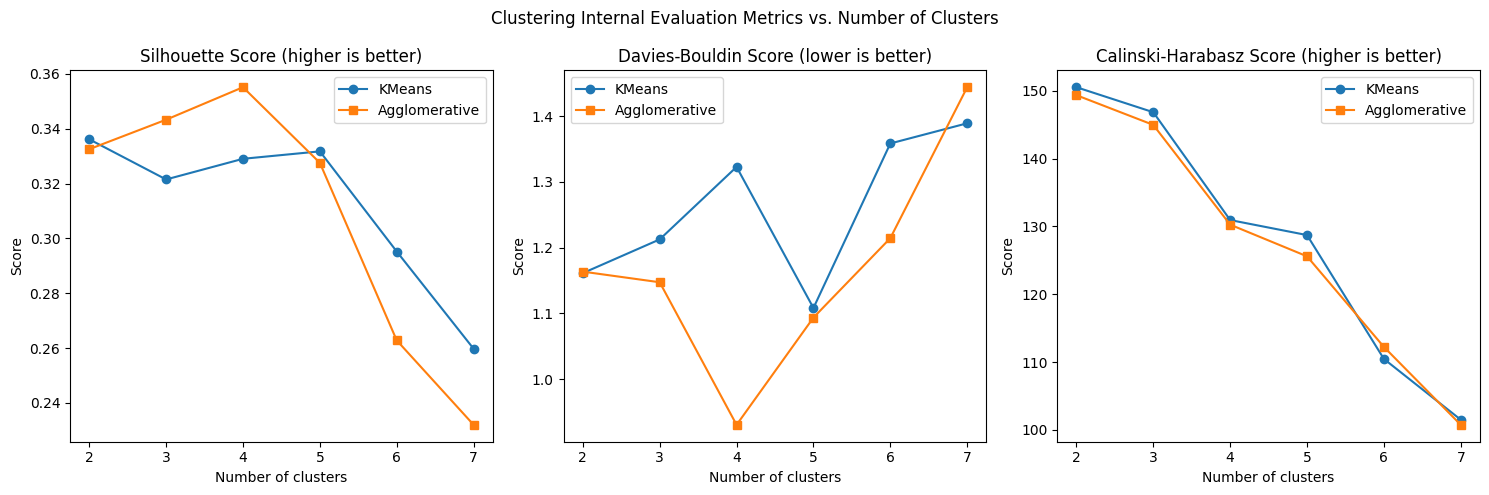

In [18]:
cluster_range = range(2, 8)
rows = []

results_kmeans = {'sil': [], 'db': [], 'ch': []}
results_agglo = {'sil': [], 'db': [], 'ch': []}
results_gmm = {'sil': [], 'db': [], 'ch': []}
# results_dbscan = {'sil': [], 'db': [], 'ch': []}

for k in cluster_range:
  # --------------------------------KMeans------------------------------------
  kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train)
  labels_k = kmeans.labels_
  cents_k = compute_centroids(X_train, labels_k)
  mae_k, mape_k = external_eval_mae_mape(cents_k, X_test)
  results_kmeans['sil'].append(silhouette_score(X_train, labels_k))
  results_kmeans['db'].append(davies_bouldin_score(X_train, labels_k))
  results_kmeans['ch'].append(calinski_harabasz_score(X_train, labels_k))
  rows.append(('KMeans', k, results_kmeans['sil'][-1], results_kmeans['db'][-1], results_kmeans['ch'][-1], mae_k, mape_k))

  # ------------------------------Agglomerative--------------------------------
  agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward').fit(X_train)
  labels_a = agglo.labels_
  cents_a = compute_centroids(X_train, labels_a)
  mae_a, mape_a = external_eval_mae_mape(cents_a, X_test)
  results_agglo['sil'].append(silhouette_score(X_train, labels_a))
  results_agglo['db'].append(davies_bouldin_score(X_train, labels_a))
  results_agglo['ch'].append(calinski_harabasz_score(X_train, labels_a))
  rows.append('Agglomerative', k, results_agglo['sil'][-1], results_agglo['db'][-1], results_agglo['ch'][-1], mae_a, mape_a)

  # ------------------------------GMM--------------------------------------------
  gmm = GaussianMixture(n_components=k, random_state=0).fit(X_train)
  labels_g = gmm.predict(X_train)
  cents_g = compute_centroids(X_train, labels_g)
  mae_g, mape_g = external_eval_mae_mape(cents_g, X_test)
  results_gmm['sil'].append(silhouette_score(X_train, labels_g))
  results_gmm['db'].append(davies_bouldin_score(X_train, labels_g))
  results_gmm['ch'].append(calinski_harabasz_score(X_train, labels_g))
  rows.append('GMM', k, results_gmm['sil'][-1], results_gmm['db'][-1], results_gmm['ch'][-1], mae_g, mape_g)

df_res = pd.DataFrame(rows, columns=['Method','k','Sil','DB','CH','MAE','MAPE'])
print(df_res.sort_values(['MAE']))

# Plot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(cluster_range, results_kmeans['sil'], marker='o', label='KMeans')
plt.plot(cluster_range, results_agglo['sil'], marker='s', label='Agglomerative')
# plt.plot(cluster_range, results_gmm['sil'], marker='^', label='GMM')
plt.title('Silhouette Score (higher is better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(1,3,2)
plt.plot(cluster_range, results_kmeans['db'], marker='o', label='KMeans')
plt.plot(cluster_range, results_agglo['db'], marker='s', label='Agglomerative')
# plt.plot(cluster_range, results_gmm['db'], marker='^', label='GMM')
plt.title('Davies-Bouldin Score (lower is better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(1,3,3)
plt.plot(cluster_range, results_kmeans['ch'], marker='o', label='KMeans')
plt.plot(cluster_range, results_agglo['ch'], marker='s', label='Agglomerative')
# plt.plot(cluster_range, results_gmm['ch'], marker='^', label='GMM')
plt.title('Calinski-Harabasz Score (higher is better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.suptitle('Clustering Internal Evaluation Metrics vs. Number of Clusters')
plt.tight_layout()
plt.show()

Based on internal metrics and short-term forecasting performance on the training/test split, I selected k=4 or k=5 as candidates. They strike a balance between internal and external evaluation, and they also align well with human cognitive categorization(weekdays, weekends, holidays, and anomalies).

Next, I validated these candidates on the independent evaluation dataset and made a final selection.

## Second attempt

In [19]:
final_rows = []

for k in [4, 5]:
    # ---- KMeans ----
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train)
    cents_k = compute_centroids(X_train, kmeans.labels_)
    mae_k, mape_k = external_eval_mae_mape(cents_k, X_eval)
    final_rows.append(('KMeans', k, mae_k, mape_k))

    # ---- Agglomerative ----
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X_train)
    cents_a = compute_centroids(X_train, agglo.labels_)
    mae_a, mape_a = external_eval_mae_mape(cents_a, X_eval)
    final_rows.append(('Agglomerative', k, mae_a, mape_a))

    # ---- GMM ----
    gmm = GaussianMixture(n_components=k, random_state=0).fit(X_train)
    lab_g = gmm.predict(X_train)
    cents_g = compute_centroids(X_train, lab_g)
    mae_g, mape_g = external_eval_mae_mape(cents_g, X_eval)
    final_rows.append(('GMM', k, mae_g, mape_g))

df_eval = pd.DataFrame(final_rows, columns=['Method','k','MAE','MAPE'])
print(df_eval.sort_values(['MAE']))

          Method  k        MAE      MAPE
3         KMeans  5  22.178552  0.196148
5            GMM  5  22.178552  0.196148
4  Agglomerative  5  22.309276  0.195238
1  Agglomerative  4  23.158945  0.204063
2            GMM  4  23.581150  0.297909
0         KMeans  4  23.581150  0.297909


Final Choice:
* Method: KMeans
* Number of clusters: 5

# Visualization

## Help Function for visualization

In [21]:
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()

## Calendar Visualization

cluster_id_weekdays_share [61, 9, 85, 80, 1]
cluster_id_weekend_share [0, 76, 0, 23, 2]
111


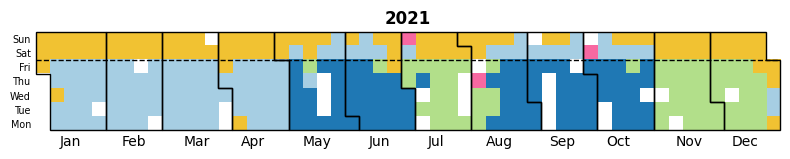

In [22]:
# final choice: KMeans, k=5
final_k =5
kmeans_final = KMeans(n_clusters=final_k, random_state=0, n_init='auto').fit(X)
cluster_labels = kmeans_final.labels_
days_not_nons = days[np.where(nans_per_day == 0)[0]]

days_colors, color_to_cluster, style_to_cluster = assign_colors(final_k, days_not_nons, cluster_labels)

make_calendar_visualization_figure(days_not_nons, cluster_labels, final_k, [2021], days_colors,
                  color_to_cluster, save_figure=None)

## Day-time profile of centroids

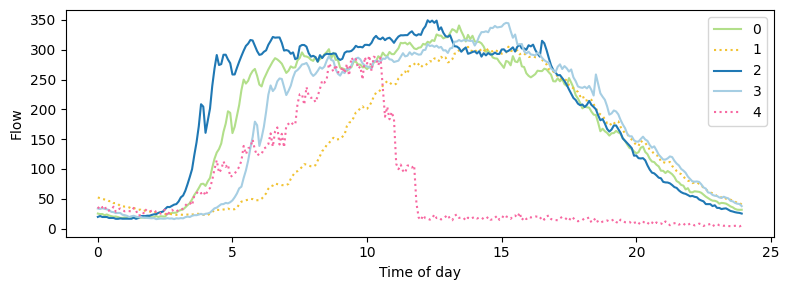

In [23]:
# Initialize empty lists to store centroid data
centroids_xx = []  # x-axis values for centroids
centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
cluster_ids = []  # Cluster IDs

# Iterate through each cluster
for i in range(0, final_k):
    # Store the x-axis values for centroids (hours of the day)
    centroids_xx.append(x_axis_hours)

    # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
    cluster_ids.append(i)

# Generate a figure displaying the centroids
make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
# The function 'make_figure_centroids' is used to create a visualization of the centroids,
# with the provided data and parameters.